# 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('sub_utf.csv')
data = data.iloc[:, :-1]
data.head(3)


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202001,8호선,산성,22,0,4469,865,7308,5246,17343,...,740,5877,162,1885,1,8,0,0,0,0
1,202001,중앙선,지평,0,0,0,0,0,0,304,...,0,0,0,0,0,0,0,0,0,0
2,202001,중앙선,용문,206,1,786,10,2083,347,3364,...,117,1818,1,948,0,6,0,0,0,0


In [3]:
dinfo = pd.read_csv('map_utf.csv')
dinfo.head(3)


,전철역명,호선,X좌표(WGS),Y좌표(WGS)
0,종로3가,1,37.571607,126.991806
1,동대문,1,37.571420,127.009745
2,서울,1,37.554648,126.972559


# 2. 데이터 정리

In [4]:
# 역명의 공백 제거
data['지하철역'] = data['지하철역'].str.strip()
data['지하철역'] = data['지하철역'].str.replace(" ", "")


In [5]:
data['지하철역']


0                 산성
1                 지평
2                 용문
3                 원덕
4                 양평
5                 오빈
6                 아신
7                 국수
8                 신원
9                 양수
10               운길산
11                팔당
12                도심
13                덕소
14                양정
15                도농
16                구리
17                양원
18                망우
19       상봉(시외버스터미널)
20                중랑
21                회기
22          신창(순천향대)
23              온양온천
24                배방
25                아산
26          쌍용(나사렛대)
27                봉명
28                대화
29                주엽
            ...     
35070             교대
35071            동묘앞
35072          남부터미널
35073             양재
35074             매봉
35075             군포
35076             의왕
35077           성균관대
35078             화서
35079             수원
35080             독산
35081             세류
35082             병점
35083             세마
35084            오산대
35085             오산
35086        

In [6]:
# 승, 하차 구분
info = data.iloc[:, :3]
info.columns = ['년월일', '호선', '역명']
info.head()

,년월일,호선,역명
0,202001,8호선,산성
1,202001,중앙선,지평
2,202001,중앙선,용문
3,202001,중앙선,원덕
4,202001,중앙선,양평


In [7]:
# 승차
riding = data.iloc[:, 3:]   
riding = riding.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46]]
riding.rename(columns={'04시-05시 승차인원':'4시', '05시-06시 승차인원':'5시', '06시-07시 승차인원':'6시','07시-08시 승차인원':'7시',
                       '08시-09시 승차인원':'8시','09시-10시 승차인원':'9시','10시-11시 승차인원':'10시','11시-12시 승차인원':'11시',
                       '12시-13시 승차인원':'12시','13시-14시 승차인원':'13시','14시-15시 승차인원':'14시','15시-16시 승차인원':'15시',
                      '16시-17시 승차인원':'16시','17시-18시 승차인원':'17시','18시-19시 승차인원':'18시','19시-20시 승차인원':'19시',
                      '20시-21시 승차인원':'20시','21시-22시 승차인원':'21시','22시-23시 승차인원':'22시','23시-24시 승차인원':'23시',
                      '00시-01시 승차인원':'24시','01시-02시 승차인원':'1시','02시-03시 승차인원':'2시','03시-04시 승차인원':'3시'}, inplace=True)
riding = pd.concat([info, riding], axis=1)
riding.head()

,년월일,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
0,202001,8호선,산성,22,4469,7308,17343,25549,14626,9138,...,8161,4080,2669,2070,1440,740,162,1,0,0
1,202001,중앙선,지평,0,0,0,304,155,1,410,...,27,72,17,0,0,0,0,0,0,0
2,202001,중앙선,용문,206,786,2083,3364,4398,3724,4853,...,2914,1550,1044,762,456,117,1,0,0,0
3,202001,중앙선,원덕,28,301,448,992,934,1179,1066,...,526,236,137,73,55,16,3,0,0,0
4,202001,중앙선,양평,33,1255,2190,7599,5168,5642,6402,...,6334,3215,2720,2498,1949,958,165,0,0,0


In [8]:
# 하차
stopover = data.iloc[:, 3:]
stopover = stopover.iloc[:,[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47]]
stopover.rename(columns={'04시-05시 하차인원':'4시', '05시-06시 하차인원':'5시', '06시-07시 하차인원':'6시','07시-08시 하차인원':'7시',
                       '08시-09시 하차인원':'8시','09시-10시 하차인원':'9시','10시-11시 하차인원':'10시','11시-12시 하차인원':'11시',
                       '12시-13시 하차인원':'12시','13시-14시 하차인원':'13시','14시-15시 하차인원':'14시','15시-16시 하차인원':'15시',
                      '16시-17시 하차인원':'16시','17시-18시 하차인원':'17시','18시-19시 하차인원':'18시','19시-20시 하차인원':'19시',
                      '20시-21시 하차인원':'20시','21시-22시 하차인원':'21시','22시-23시 하차인원':'22시','23시-24시 하차인원':'23시',
                      '00시-01시 하차인원':'24시','01시-02시 하차인원':'1시','02시-03시 하차인원':'2시','03시-04시 하차인원':'3시'}, inplace=True)
stopover = pd.concat([info, stopover], axis=1)
stopover.head()

,년월일,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
0,202001,8호선,산성,0,865,5246,3899,6059,5082,5343,...,18152,16188,11476,11692,10465,5877,1885,8,0,0
1,202001,중앙선,지평,0,0,0,141,41,0,303,...,89,123,0,0,0,0,0,0,0,0
2,202001,중앙선,용문,1,10,347,1147,2893,2048,3245,...,4031,3130,3418,1924,1958,1818,948,6,0,0
3,202001,중앙선,원덕,0,3,55,193,405,388,483,...,907,705,594,745,365,355,205,0,0,0
4,202001,중앙선,양평,5,73,1173,2676,5965,4778,5287,...,6296,6412,5702,3225,3118,4138,1410,6,0,0


# 3. 데이터프레임 조작하기

### 3.1 일별 승하차 데이터 합계 구하기

In [9]:
# 승차 인원 합계
riding['합계'] = riding.sum(axis=1)
stopover['합계'] = stopover.sum(axis=1)
riding.head()


,년월일,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,19시,20시,21시,22시,23시,24시,1시,2시,3시,합계
0,202001,8호선,산성,22,4469,7308,17343,25549,14626,9138,...,4080,2669,2070,1440,740,162,1,0,0,359822
1,202001,중앙선,지평,0,0,0,304,155,1,410,...,72,17,0,0,0,0,0,0,0,203386
2,202001,중앙선,용문,206,786,2083,3364,4398,3724,4853,...,1550,1044,762,456,117,1,0,0,0,267490
3,202001,중앙선,원덕,28,301,448,992,934,1179,1066,...,236,137,73,55,16,3,0,0,0,213165
4,202001,중앙선,양평,33,1255,2190,7599,5168,5642,6402,...,3215,2720,2498,1949,958,165,0,0,0,296025


### 3.2 필요한 정보로 데이터프레임 구성

In [10]:
# 승차
df_r = riding[['년월일', '호선', '역명', '합계']]
df_r.head()


,년월일,호선,역명,합계
0,202001,8호선,산성,359822
1,202001,중앙선,지평,203386
2,202001,중앙선,용문,267490
3,202001,중앙선,원덕,213165
4,202001,중앙선,양평,296025


In [11]:
# 하차
df_s = stopover[['년월일', '호선', '역명', '합계']]
df_s.head()


,년월일,호선,역명,합계
0,202001,8호선,산성,356057
1,202001,중앙선,지평,203185
2,202001,중앙선,용문,267988
3,202001,중앙선,원덕,212740
4,202001,중앙선,양평,297030


### 3.3 평균으로 1일 이용객 합계 만들기

In [12]:
# 승차
dfg_r = df_r.groupby(['년월일','호선','역명'])['합계'].mean()


In [13]:
dfg_r.head()


년월일     호선   역명 
201501  1호선  동대문     685290.0
             동묘앞     487051.0
             서울역    2362117.0
             시청      950070.0
             신설동     714195.0
Name: 합계, dtype: float64

In [14]:
# 하차
dfg_s = df_s.groupby(['년월일','호선','역명'])['합계'].mean()


In [15]:
dfg_s.head()


년월일     호선   역명 
201501  1호선  동대문     744000.0
             동묘앞     502159.0
             서울역    2118269.0
             시청      944482.0
             신설동     696821.0
Name: 합계, dtype: float64

In [16]:
# 데이터프레임 수정
# 승차
dfg2_r = pd.DataFrame(dfg_r)
dfg2_r = dfg2_r.reset_index()
dfg2_r.head()


,년월일,호선,역명,합계
0,201501,1호선,동대문,685290.0
1,201501,1호선,동묘앞,487051.0
2,201501,1호선,서울역,2362117.0
3,201501,1호선,시청,950070.0
4,201501,1호선,신설동,714195.0


In [17]:
# 하차
dfg2_s = pd.DataFrame(dfg_s)
dfg2_s = dfg2_s.reset_index()
dfg2_s.head()


,년월일,호선,역명,합계
0,201501,1호선,동대문,744000.0
1,201501,1호선,동묘앞,502159.0
2,201501,1호선,서울역,2118269.0
3,201501,1호선,시청,944482.0
4,201501,1호선,신설동,696821.0


In [18]:
# 합계 컬럼 --> 이용객수
dfg2_r.columns = ['년월일', '호선', '역명', '이용객수']
dfg2_s.columns = ['년월일', '호선', '역명', '이용객수']
dfg2_s


,년월일,호선,역명,이용객수
0,201501,1호선,동대문,744000.0
1,201501,1호선,동묘앞,502159.0
2,201501,1호선,서울역,2118269.0
3,201501,1호선,시청,944482.0
4,201501,1호선,신설동,696821.0
5,201501,1호선,제기동,843820.0
6,201501,1호선,종각,1680597.0
7,201501,1호선,종로3가,1382935.0
8,201501,1호선,종로5가,1075993.0
9,201501,1호선,청량리(지하),1153424.0


In [19]:
# 승하차 평균값으로 1년 1일 평균 이용객 수 알아보기 
dfg3_r = pd.DataFrame(round(dfg2_r.groupby(['호선', '역명'])['이용객수'].mean()))
dfg3_s = pd.DataFrame(round(dfg2_s.groupby(['호선', '역명'])['이용객수'].mean()))
dfg3_s


이용객수
호선  역명                     
1호선 동대문            734126.0
    동묘앞            533031.0
    서울역           1842308.0
    시청             972906.0
    신설동            680105.0
    제기동            821001.0
    종각            1508172.0
    종로3가          1202942.0
    종로5가          1014198.0
    청량리(서울시립대입구)  1040369.0
    청량리(지하)       1137270.0
2호선 강남            3298097.0
    강변            1738015.0
    강변(동서울터미널)    1611115.0
    건대입구          1699924.0
    교대            1476230.0
    교대(법원.검찰청)    1444792.0
    구로디지털단지       2113798.0
    구의             919647.0
    구의(광진구청)       905250.0
    낙성대           1094062.0
    당산             939446.0
    대림            1209184.0
    대림(구로구청)      1135067.0
    도림천            238208.0
    동대문역사문화공원      850704.0
    뚝섬             742085.0
    문래             793999.0
    방배             834581.0
    봉천             877428.0
...                     ...
장항선 배방             232131.0
    봉명             243190.0
    신창             267865.0
    신창(순천향대)       264279.0
    쌍용(나사렛대)       276569.0
    쌍용동            281614.0
    아산             280038.0
    온양온천           360561.0
중앙선 구리             643298.0
    국수             228077.0
    덕소             398645.0
    도농             451600.0
    도심             269708.0
    망우             450717.0
    상봉             371886.0
    상봉(시외버스터미널)    381629.0
    신원             208374.0
    아신             226500.0
    양수             267398.0
    양원             260908.0
    양정             224831.0
    양평             318998.0
    오빈             212186.0
    용문             298877.0
    운길산            233039.0
    원덕             214502.0
    중랑             374821.0
    지평             203285.0
    팔당             231278.0
    회기            1088348.0

[665 rows x 1 columns]

In [20]:
# 이용객수로 정렬
dfg3_r = dfg3_r.sort_values(by='이용객수', ascending=False)
dfg3_s = dfg3_s.sort_values(by='이용객수', ascending=False)
dfg3_s.head(20)


이용객수
호선  역명                    
2호선 강남           3298097.0
    잠실(송파구청)     2745190.0
    홍대입구         2732710.0
    잠실           2533679.0
    신림           2324569.0
    구로디지털단지      2113798.0
    신도림          2060619.0
    삼성(무역센터)     2018657.0
    삼성           2005753.0
3호선 고속터미널        1992323.0
1호선 서울역          1842308.0
경부선 영등포          1818084.0
2호선 서울대입구        1789032.0
    서울대입구(관악구청)  1767263.0
    신촌           1741353.0
    강변           1738015.0
    역삼           1737638.0
    을지로입구        1720526.0
    건대입구         1699924.0
경부선 수원           1692827.0

In [21]:
# 인덱스 리빌드
dfg4_r = pd.DataFrame(dfg3_r)
dfg4_r = dfg4_r.reset_index()
dfg4_r.head()


,호선,역명,이용객수
0,2호선,강남,3257849.0
1,2호선,잠실(송파구청),2887228.0
2,2호선,잠실,2730351.0
3,2호선,홍대입구,2567985.0
4,2호선,신림,2374948.0


In [22]:
dfg4_s = pd.DataFrame(dfg3_s)
dfg4_s = dfg4_s.reset_index()
dfg4_s.head()


,호선,역명,이용객수
0,2호선,강남,3298097.0
1,2호선,잠실(송파구청),2745190.0
2,2호선,홍대입구,2732710.0
3,2호선,잠실,2533679.0
4,2호선,신림,2324569.0


# 4. 데이터 시각화

In [23]:
import matplotlib.pyplot as plt

In [24]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='/Users/choijia/aL.ttf').get_name()
rc('font', family=font_name)

/Users/choijia/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['KoreanCNML'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


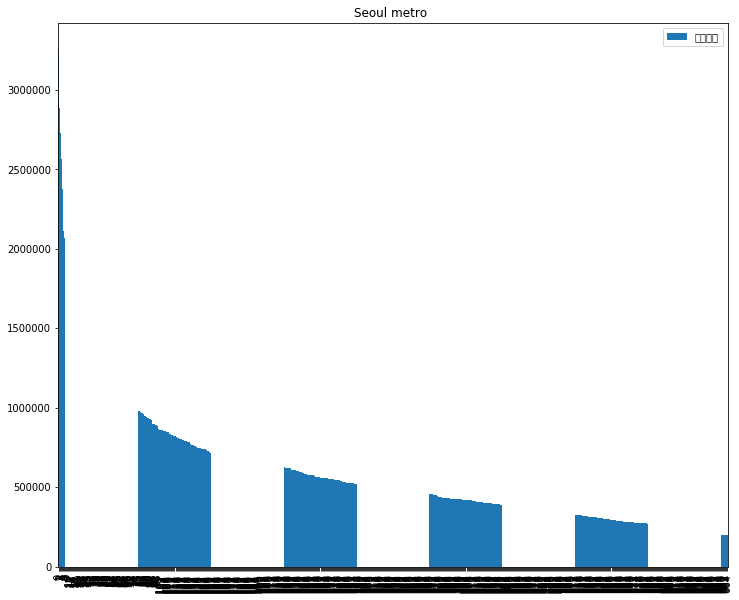

In [25]:
# 시각화
dfg4_r.plot(kind='bar', figsize=(12,10))
plt.title('Seoul metro ')
# plt.ylable('일평균 이용자 수')
plt.show()

### 4.1 역사정보에서 위도/경도 데이터 가져와서 병합하기

In [26]:
dinfo = pd.read_csv('map_utf.csv')


In [27]:
dinfo.head()


,전철역명,호선,X좌표(WGS),Y좌표(WGS)
0,종로3가,1,37.571607,126.991806
1,동대문,1,37.571420,127.009745
2,서울,1,37.554648,126.972559
3,신도림,1,37.508725,126.891295
4,시청,1,37.564718,126.977108


In [28]:
dinfo.columns = ['역명', '호선', '위도', '경도']
dinfo.head()


,역명,호선,위도,경도
0,종로3가,1,37.571607,126.991806
1,동대문,1,37.571420,127.009745
2,서울,1,37.554648,126.972559
3,신도림,1,37.508725,126.891295
4,시청,1,37.564718,126.977108


In [29]:
dinfo['역명'] = dinfo['역명'].str.strip()
dinfo['역명'] = dinfo['역명'].str.replace(" ", "")


In [30]:
dfg4_r['호선'].unique()


array(['2호선', '3호선', '1호선', '경부선', '4호선', '경인선', '7호선', '5호선', '과천선',
       '9호선', '중앙선', '분당선', '경원선', '안산선', '일산선', '8호선', '9호선2~3단계', '6호선',
       '공항철도 1호선', '9호선2단계', '경의선', '경강선', '경춘선', '수인선', '우이신설선', '장항선'],
      dtype=object)

In [31]:
# 1~9 호선 까지만 분리. 
dfg4_r = dfg4_r[dfg4_r['호선'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'])]
dfg4_s = dfg4_s[dfg4_s['호선'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'])]


In [32]:
dfg4_r.loc[dfg4_r['호선']=='1호선', '호선'] = 1
dfg4_r.loc[dfg4_r['호선']=='2호선', '호선'] = 2
dfg4_r.loc[dfg4_r['호선']=='3호선', '호선'] = 3
dfg4_r.loc[dfg4_r['호선']=='4호선', '호선'] = 4
dfg4_r.loc[dfg4_r['호선']=='5호선', '호선'] = 5
dfg4_r.loc[dfg4_r['호선']=='6호선', '호선'] = 6
dfg4_r.loc[dfg4_r['호선']=='7호선', '호선'] = 7
dfg4_r.loc[dfg4_r['호선']=='8호선', '호선'] = 8
dfg4_r.loc[dfg4_r['호선']=='9호선', '호선'] = 9


In [33]:
dfg4_s.loc[dfg4_s['호선']=='1호선', '호선'] = 1
dfg4_s.loc[dfg4_s['호선']=='2호선', '호선'] = 2
dfg4_s.loc[dfg4_s['호선']=='3호선', '호선'] = 3
dfg4_s.loc[dfg4_s['호선']=='4호선', '호선'] = 4
dfg4_s.loc[dfg4_s['호선']=='5호선', '호선'] = 5
dfg4_s.loc[dfg4_s['호선']=='6호선', '호선'] = 6
dfg4_s.loc[dfg4_s['호선']=='7호선', '호선'] = 7
dfg4_s.loc[dfg4_s['호선']=='8호선', '호선'] = 8
dfg4_s.loc[dfg4_s['호선']=='9호선', '호선'] = 9


In [34]:
# 역정보와 이용객수 merge
# 승차
df_m_r = pd.merge(dfg4_r, dinfo, how='inner')
df_m_r


,호선,역명,이용객수,위도,경도
0,2,강남,3257849.0,37.497175,127.027926
1,2,강남,3257849.0,37.497175,127.027926
2,2,잠실,2730351.0,37.513950,127.102234
3,2,잠실,2730351.0,37.513950,127.102234
4,2,홍대입구,2567985.0,37.557192,126.925381
5,2,홍대입구,2567985.0,37.557192,126.925381
6,2,홍대입구,2567985.0,37.557192,126.925381
7,2,신림,2374948.0,37.484201,126.929715
8,2,구로디지털단지,2112317.0,37.485266,126.901401
9,2,신도림,2068554.0,37.508725,126.891295


In [35]:
# 하차
df_m_s = pd.merge(dfg4_s, dinfo, how='inner')
df_m_s


,호선,역명,이용객수,위도,경도
0,2,강남,3298097.0,37.497175,127.027926
1,2,강남,3298097.0,37.497175,127.027926
2,2,홍대입구,2732710.0,37.557192,126.925381
3,2,홍대입구,2732710.0,37.557192,126.925381
4,2,홍대입구,2732710.0,37.557192,126.925381
5,2,잠실,2533679.0,37.513950,127.102234
6,2,잠실,2533679.0,37.513950,127.102234
7,2,신림,2324569.0,37.484201,126.929715
8,2,구로디지털단지,2113798.0,37.485266,126.901401
9,2,신도림,2060619.0,37.508725,126.891295


In [36]:
# 중복제거
df_m_r_2 = df_m_r.drop_duplicates('이용객수', keep='first')
df_m_s_2 = df_m_s.drop_duplicates('이용객수', keep='first')


In [37]:
# 상위, 하위 30개 역 표시
# 승차
dfm_top_r = df_m_r_2.head(30)
dfm_bottom_r = df_m_r_2.tail(30)

# 하차
dfm_top_s = df_m_s_2.head(30)
dfm_bottom_s = df_m_s_2.tail(30)


In [66]:
dfm_top_r.head()


,호선,이용객수,위도,경도
역명,,,,
강남,2,3257849.0,37.497175,127.027926
잠실,2,2730351.0,37.513950,127.102234
홍대입구,2,2567985.0,37.557192,126.925381
신림,2,2374948.0,37.484201,126.929715
구로디지털단지,2,2112317.0,37.485266,126.901401


In [77]:
dfm_bottom_r.head()


,호선,역명,이용객수,위도,경도
368,3,무악재,328475.0,37.582299,126.950291
369,2,신설동,328112.0,37.575297,127.025087
372,5,청구,327338.0,37.560245,127.013828
374,9,신목동,324475.0,37.544277,126.883080
375,6,역촌,320442.0,37.606021,126.922744


### 4.2 이용객수 TOP 30 지도에 시각화해보기

In [38]:
# 지도시각화 
# import folium
#map_osm_r = folium.Map(loaction=[35.166804, 129.083479], zoom_start=12) # 지도 초기 로딩위치
#map_osm_s = folium.Map(loaction=[35.166804, 129.083479], zoom_start=12) # 지도 초기 로딩위치



In [39]:
# 지도로 승차 상위 이용객 30개역 표시 
#for item in dfm_top_r.index:
#   lat = dfm_top_r.loc[item, '위도']
 #   long = dfm_top_r.loc[item, '경도']
#    folium.CircleMarker([lat,long],
 #                                   radius=dfm_top_r.loc[item, '이용객수']/1500,
   #                                 popup=dfm_top_r.loc[item, '역명'],
    #                               color='blue',
      #                              fill = True
        #               ).add_to(map_osm_r)
#map_osm_r
    

# 5. 데이터 시각화 with Json

In [53]:
import folium 

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map

In [69]:
map2 = folium.Map(location=[37.497175, 127.027926], zoom_start=13)
folium.Marker([37.497175, 127.027926]).add_to(map2)
folium.CircleMarker([37.497175, 127.027926], radius=10, 
                              color='green', fill=True).add_to(map2)
map2

In [72]:
# 지도로 승차 상위 이용객 30개역 표시 
map3 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_top_r.index:
    lat = dfm_top_r.loc[item, '위도']
    long = dfm_top_r.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_top_r.loc[item, '이용객수']/70000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map3)
    
map3.save('seoul_metro_riding_top30.html')
map3

In [76]:
# 지도로 하차 상위 이용객 30개역 표시 
map4 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_top_s.index:
    lat = dfm_top_s.loc[item, '위도']
    long = dfm_top_s.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_top_s.loc[item, '이용객수']/70000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map4)
    
map4.save('seoul_metro_stopover_top30.html')
map4

In [82]:
# 지도로 승차 하위 이용객 30개역 표시 
map5 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_bottom_r.index:
    lat = dfm_bottom_r.loc[item, '위도']
    long = dfm_bottom_r.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_bottom_r.loc[item, '이용객수']/20000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map5)
    
map5.save('seoul_metro_riding_bottom30.html')
map5

In [83]:
# 지도로 하차 하위 이용객 30개역 표시 
map6 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_bottom_s.index:
    lat = dfm_bottom_s.loc[item, '위도']
    long = dfm_bottom_s.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_bottom_s.loc[item, '이용객수']/20000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map6)
    
map6.save('seoul_metro_stopover_bottom30.html')
map6